In [1]:
import sys
import os
import toml
import polars as pl
import sqlite3
import numpy as np

from ipywidgets import interactive, IntSlider
from matplotlib import cm
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import PercentFormatter
from mpl_toolkits.mplot3d.axes3d import Axes3D
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

if '../' not in sys.path:
    sys.path.append('../')

In [2]:
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r'\usepackage{amsmath}\usepackage{amssymb}'
plt.rcParams["font.family"] = r'serif'
plt.rcParams["font.serif"] = r'Computer Modern'

golden_ratio = (1 + 5 ** 0.5) / 2
cm_to_in = 1/2.54  # centimeters in inches
width = 8.45 * cm_to_in
height = width / golden_ratio

def save_fig(fig, filename):
    fig.savefig(os.path.join('/home/ndhuynh/transfer', filename), dpi=300, format='pdf', bbox_inches='tight')

In [14]:
from axe.lsm.cost import Cost
from axe.lsm.types import Policy, System, LSMDesign, LSMBounds, Workload
from axe.lcm.data.schema import LCMDataSchema, kWORKLOAD_HEADER, kSYSTEM_HEADER
from axe.ltuner.data.schema import LTunerDataSchema
from experiments.evaluate_lcm import LCMEvaluator

# Data Loading

Either load in model and evaluator, run experiment over notebook or load in data from sqlite db

In [16]:
model_path = "../data/lcm/models/kaplsm_250522_1259/"
config = toml.load(os.path.join(model_path, "axe.toml"))
policy = getattr(Policy, config['lsm']['policy'])
bounds = LSMBounds(**config['lsm']['bounds'])
ltune_schema = LTunerDataSchema(policy=policy, bounds=bounds)
lcm_schema = LCMDataSchema(policy=policy, bounds=bounds)

evaluator = LCMEvaluator(config, path=model_path, model="best_model.model")
table = evaluator.evaluate(num_samples=10000)

Eval: 100%|█████████████████████████████| 10000/10000 [00:01<00:00, 7449.73it/s]


In [21]:
# connection = sqlite3.connect("../data/axe_data.db")
# table = pl.read_database("SELECT * FROM lcm_evaluation;", connection)

In [22]:
table

z0_cost,z1_cost,q_cost,w_cost,empty_reads,non_empty_reads,range_queries,writes,entries_per_page,selectivity,entry_size,mem_budget,num_entries,bits_per_elem,size_ratio,policy,kap0,kap1,kap2,kap3,kap4,kap5,kap6,kap7,kap8,kap9,kap10,kap11,kap12,kap13,kap14,kap15,kap16,kap17,kap18,kap19,cost_acm,cost_lcm,delta,norm_delta
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,i64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.59363,0.927424,2.705623,0.043809,0.225,0.432,0.166,0.177,32.0,8.8916e-8,4096,8.885327,214730141,2.604,8,3,3.0,6.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.270486,4.394932,-0.124445,-0.029141
0.000663,0.199418,12.517919,0.018639,0.006,0.196,0.766,0.032,32.0,3.0527e-8,1024,5.863251,290435197,5.746,6,3,5.0,4.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.736641,11.681372,1.055269,0.082853
0.021264,0.553021,10.473058,0.039998,0.012,0.311,0.669,0.008,4.0,4.1284e-8,8192,8.747203,178231118,3.659,15,3,1.0,7.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,11.08734,10.66038,0.42696,0.038509
0.313731,0.54953,8.322792,0.000597,0.22,0.335,0.43,0.015,128.0,2.5416e-8,1024,8.009809,108901743,3.811,10,3,9.0,8.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.186649,9.23175,-0.045101,-0.004909
0.807603,1.069834,6.187721,0.021203,0.176,0.338,0.296,0.19,32.0,5.5631e-8,1024,15.602167,411203839,1.757,17,3,16.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.086361,8.105338,-0.018977,-0.002347
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0.127612,0.654175,9.039494,0.037354,0.109,0.427,0.408,0.056,32.0,5.1135e-8,1024,5.616375,133355026,5.508,15,3,7.0,1.0,9.0,13.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.858636,8.496617,1.362019,0.138155
0.024254,0.210335,6.190109,0.014723,0.306,0.203,0.285,0.206,128.0,4.7728e-8,1024,8.546604,200611317,8.059,10,3,8.0,4.0,9.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.439421,6.316723,0.122698,0.019054
0.040668,0.030604,13.265943,0.381411,0.016,0.014,0.466,0.504,8.0,8.3594e-8,8192,14.486209,279261914,3.719,18,3,8.0,14.0,12.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,13.718625,13.504951,0.213675,0.015576


epoch,train_loss,test_loss
i64,f64,f64
0,15.309311,40.044988


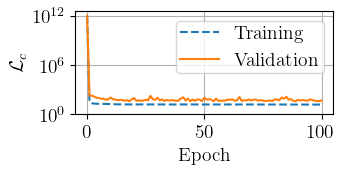

In [23]:
plt.rcParams.update({'font.size': 14})
losses = pl.read_csv(os.path.join(model_path, 'losses.csv'))
fig, ax = plt.subplots(figsize=(width, 0.65*height))
ax.plot(losses['epoch'], losses['train_loss'], label='Training', linestyle='--')
ax.plot(losses['epoch'], losses['test_loss'], label='Validation', linestyle='-')
ax.set_xlabel('Epoch')
ax.set_ylabel(r'$\mathcal{{L}}_c$')
ax.set_yscale('log')
ax.set_yticks([1e12,  1e6,  1e0])
ax.grid()
_ = ax.legend(loc='upper right', borderpad=0.2)
losses.min()
# save_fig(fig, 'lcm_loss.pdf')

In [24]:
cutoff = 0.1
data = table.filter((pl.col('norm_delta') < cutoff) & (pl.col('norm_delta') > -cutoff))
print(f'Percentange within {cutoff:.0%} delta: {len(data) / len(table):.3%}')

Percentange within 10% delta: 92.300%


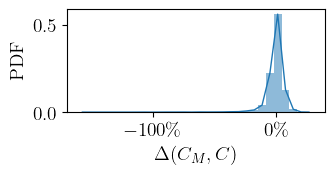

In [25]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(width, 0.65*height))
data = table['norm_delta']
hist, bins, _ = ax.hist(data, bins=30, alpha=0.5, weights=np.ones_like(data)/len(data))
# ax.hist(data, bins=50, density=True)
bin_center = (bins[1:] + bins[:-1]) / 2
ax.plot(bin_center, hist, color='tab:blue', linewidth=1)
ax.set_xlabel(r'$\Delta(C_{M}, C)$')
ax.set_ylabel('PDF')
ax.xaxis.set_major_formatter(PercentFormatter(1))
# save_fig(fig, 'lcm_normalized_cost.pdf')

In [26]:
def plot_workload_trend(table: pl.DataFrame, trend='stune_T'):
    fig = plt.figure()
    ax = Axes3D(fig, auto_add_to_figure=False, computed_zorder=False)
    fig.add_axes(ax)
    ax.set_xlim3d(0, 1), ax.set_ylim3d(1, 0), ax.set_zlim3d(0, 1)
    ax.set_xticks([0, 0.5, 1]), ax.set_yticks([0, 0.5, 1]), ax.set_zticks([0, 0.5, 1])
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.zaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    edge = ax.plot([0, 1, 0, 0], [0, 0, 1, 0], [1, 0, 0, 1], color='black', zorder=3)
    ax.set_yticks([0.5])

    ax.set_xlabel('Point-Reads', labelpad=10)
    ax.set_ylabel('Range-Reads', labelpad=10)
    ax.set_zlabel('Writes', labelpad=10)

    sc = ax.scatter(
        table['empty_reads'] + table['non_empty_reads'],
        table['range_queries'],
        table['writes'],
        c=table[trend],
        cmap='viridis'
    )
    cbar = plt.colorbar(sc)
    cbar.set_label(trend)
    
    return fig, ax, sc, cbar

Text(0.5, 0.92, 'Performance Over Workloads')

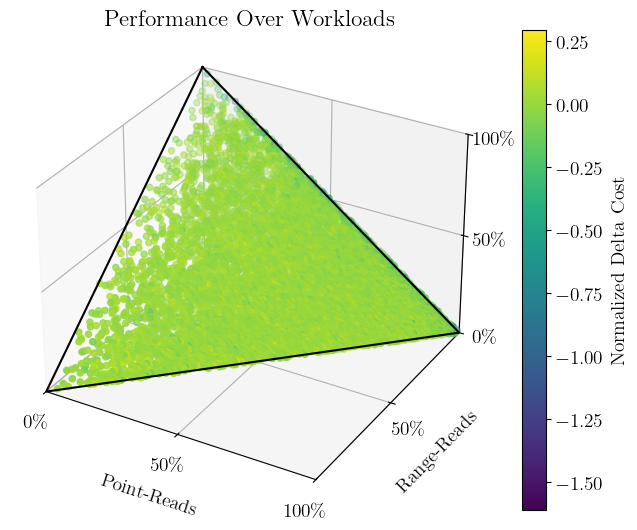

In [27]:
fig, ax, sc, cbar = plot_workload_trend(table, 'norm_delta')
cbar.set_label('Normalized Delta Cost')
ax.set_title('Performance Over Workloads', pad=-10)
# save_fig(fig, 'lcm_delta_over_workload.pdf')

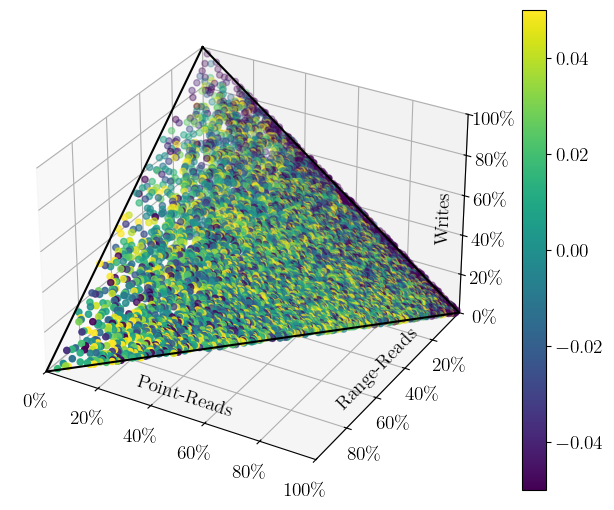

In [28]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False, computed_zorder=False)
fig.add_axes(ax)
ax.set_xlim3d(0, 1), ax.set_ylim3d(1, 0), ax.set_zlim3d(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8])
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.zaxis.set_major_formatter(mtick.PercentFormatter(1.0))
edge = ax.plot([0, 1, 0, 0], [0, 0, 1, 0], [1, 0, 0, 1], color='black', zorder=3)
# ax.set_yticks([0.5])

ax.set_xlabel('Point-Reads', labelpad=-30)
ax.set_ylabel('Range-Reads', labelpad=-30)
ax.set_zlabel('Writes', labelpad=-30)

sc = ax.scatter(
    table['empty_reads'] + table['non_empty_reads'],
    table['range_queries'],
    table['writes'],
    c=table['norm_delta'],
    cmap='viridis',
    vmin=-0.05,
    vmax=0.05
)
cbar = plt.colorbar(sc)
# cbar.set_label()

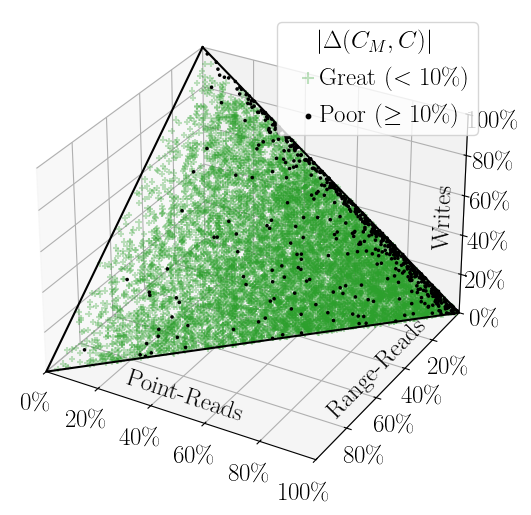

In [29]:
plt.rcParams.update({'font.size': 18})
cutoff = (0.1)
groupa = table.filter(pl.col('norm_delta') > -cutoff)
groupb = table.filter(pl.col('norm_delta') < -cutoff)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False, computed_zorder=False)
fig.add_axes(ax)
ax.set_xlim3d(0, 1), ax.set_ylim3d(1, 0), ax.set_zlim3d(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8])
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.zaxis.set_major_formatter(mtick.PercentFormatter(1.0))
edge = ax.plot([0, 1, 0, 0], [0, 0, 1, 0], [1, 0, 0, 1], color='black', zorder=3)

ax.set_xlabel('Point-Reads', labelpad=-30)
ax.set_ylabel('Range-Reads', labelpad=-30)
ax.set_zlabel('Writes', labelpad=-30)
ax.scatter(groupa['empty_reads'] + groupa['non_empty_reads'],
           groupa['range_queries'], groupa['writes'],
           label=f'Great ($<$ {cutoff*100:.0f}\\%)',
           alpha=0.3, marker='+', color='tab:green', rasterized=True)
ax.scatter(groupb['empty_reads'] + groupb['non_empty_reads'],
           groupb['range_queries'], groupb['writes'],
           label=f'Poor ($\\ge$ {cutoff*100:.0f}\\%)',
           alpha=1, marker='.', color='black', rasterized=True, s=10)
# ax.set_title(f'Performance Cutoff for Tunings: $\pm${cutoff:.0%} Delta Cost')
ax.legend(title=r'$|\Delta(C_M, C)|$', loc='upper right', handletextpad=-0.5, markerscale=2, borderpad=0.25)
plt.show()
# save_fig(fig, 'lcm_perf_cutoff.ptable')